# Homework 5

### Name: Emma Virnelli
### Collaborator: Tomiwa


DATA 201

Fall 2024

Tufts University

This homework explores KNN, Decision Trees, and Random Forests. The first question reviews training a KNN model. Subsequent questions provide an in-depth examination of Gini impurity and the mechanics of training a Decision Tree. Following this, we delve into basic implementations of both Decision Trees and Random Forests, accompanied by an introduction to tuning hyperparameters.

# Question 1

(a) Load the Heart Disease dataset and name it 'df'. Conduct data cleaning.

- Perform any data cleaning or data transformation steps if required
- Explain some of the data cleaning steps which you can perform on **any** data set

For clarification, please find the metadata below:
- BPMeds: whether or not the patient was on blood pressure medication
- prevalentStroke: whether or not the patient had previously had a stroke
- prevalentHyp: whether or not the patient was hypertensive
- diabetes: whether or not the patient had diabetes
- totChol: total cholesterol level
- sysBP: systolic blood pressure
- diaBP: diastolic blood pressure
- BMI: Body Mass Index
- heartRate: heart rate
- glucose: glucose level
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) (Predictor Variable)

(b) Create two dataframes for features and target variable (TenYearCHD). Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confuison matrix tells you

(c) Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
#Q1 (a)

# Load the Heart Disease dataset
df = pd.read_csv("Heart Disease.csv")


# Check is there is any null values and drop null values in order to clean it 
df.isnull().sum()
df = df.dropna() 


In [10]:
#Q1 (b)

# Create two dataframes for features and target variable (TenYearCHD)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Full model training and testing (30%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy, confusion matrix, and explain what the confuison matrix tells you
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8279
Confusion Matrix:
[[893  29]
 [160  16]]


The confusion matrix is explaining the number of times the models classified the classes correctly or incorrectly.

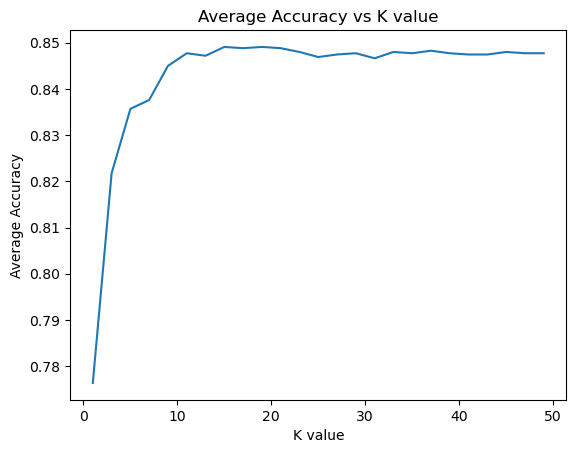

Best K value: 15


In [12]:
#Q1 (c)

# Create a range from 1 to 50 going at steps of 2
k_range = range(1, 51, 2)
avg_accuracies = []


# Store average accuracy at each k value use a for loop to compute the average accuracy over 10-fold cross validation for each k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    avg_accuracies.append(scores.mean())

# Plot the average accuracy for each k values
plt.plot(k_range, avg_accuracies)
plt.xlabel('K value')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs K value')
plt.show()

# Determine which k value you will choose
best_k = k_range[np.argmax(avg_accuracies)]
print(f"Best K value: {best_k}")

# Question 2

The goal of Q2 is to make a function that can calculate the weighted gini impurity over any grouping and any size of classes. 

(a) Calculate the gini impurity of the example by hand. Then write some code to do it for you. You will have to find $p_0$ and $p_1$ which are the probabilities of selecting a 0 and a 1 (respectively) from the group.

(b) Now say we have two groups? Calculate the gini index of each group. Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).

(c) Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).

(d) Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

In [17]:
#Q2 (a)

###This is the example
classes = [0,1]
group = [0,0,0,1,1,0,1,0,0]

class_value_counts = pd.Series(group).value_counts()

# Gini Impurity Code
def gini_impurity(value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum + (value_counts[key] / n) * (value_counts[key] / n)
    gini = 1 - p_sum
    return gini


gini = gini_impurity(class_value_counts)
print(f"Gini Impurity: {gini:.3f}")

Gini Impurity: 0.444


In [26]:
#Q2 (b)
classes = [0,1]
groups = [[0,0,0,1],[0,0,1,1]]

# Since I created the function to calculate the gini impurity, I will use it again
def gini_impurity(value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum + (value_counts[key] / n) * (value_counts[key] / n)
    gini = 1 - p_sum
    return gini

#Take groups and classify seperately
group_one = [0,0,0,1]
group_two = [0,0,1,1]

class_value_counts1 = pd.Series(group_one).value_counts()
class_value_counts2 = pd.Series(group_two).value_counts()

gini_one = gini_impurity(class_value_counts1)
gini_two = gini_impurity(class_value_counts2)

# Total length and weights
total_length = len(group_one) + len(group_two)
weight_one = len(group_one) / total_length
weight_two = len(group_two) / total_length

# Weighted sum of the gini numbers
weighted_gini = (weight_one * gini_one) + (weight_two * gini_two)


print(f"Weighted Gini Impurity: {weighted_gini:.3f}")

Weighted Gini Impurity: 0.438


In [22]:
#Q2 (c)
###test your bit of code with:
classes = [0,1,2,3]
groups = [[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]


def gini_impurity(value_counts):
    n = sum(value_counts.values())  
    if n == 0: 
        return 0
    p_sum = 0
    for count in value_counts.values():
        p_sum += (count / n) ** 2
    gini = 1 - p_sum
    return gini

# Generalize that bit of code you wrote to now deal with any number of groups with any number of classes
def generalized_gini(groups, classes):
    total_instances = sum(len(group) for group in groups)  
    gini_total = 0.0
    
    for group in groups:
        if len(group) == 0:
            continue  # needs to be an if statement to make sure we do not divide by 0
        value_counts = {cls: group.count(cls) for cls in classes}  
        group_size = len(group)
        gini = gini_impurity(value_counts)
        gini_total += (group_size / total_instances) * gini  
    
    return gini_total


result = generalized_gini(groups, classes)
print(f"Generalized Gini Impurity: {result:.4f}")


###You should get a gini number equal to 0.5684

Generalized Gini Impurity: 0.5684


In [24]:
#Q2 (d)

# gini_imp which takes a 'groups' variable and a 'classes' variable
def gini_imp(groups, classes):
    total_samples = sum(len(group) for group in groups)
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        
        score = 0.0
        for class_val in classes:
            p = group.count(class_val) / size
            score += p * p
        
        gini += (1.0 - score) * (size / total_samples)
    
    return gini

# Test with example from part c
classes = [0,1,2,3]
groups = [[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]

result = gini_imp(groups, classes)
print(f"Gini Impurity: {result:.4f}")

Gini Impurity: 0.5684


# Question 3

To make a full decision trees

(a) Load the datasets titanic_train_data and titanic_test_data into dataframes and split them into X_train, X_test, y_train and y_test (the training sets are coming from the titanic train data and visa versa). Note, the first two columns should be deleted because they are just passenger Id's, also documentation about the data can be found here:https://www.kaggle.com/azeembootwala/titanic. Create a Decision Tree instance, fit the data on the training sets and get the accuracy score on the test set. Report the confusion matrix.

(b) Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. We are going to try and tune some parameters in the Decision tree. Called a new Decision Tree instance with the following parameters: **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). What do these parameters do? (Look them up in the documentation)

(c) We are going to use the validation sets to try and find the best parameter combinations. So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. Then, use that combination on a decision tree to classify the test set.

In [54]:
#Q3 (a)
#Libraries for decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the datasets titanic_train_data and titanic_test_data into dataframes 
titanic_test_data  = pd.read_csv("titanic_test_data.csv")
titanic_train_data = pd.read_csv("titanic_train_data.csv")

#Delete first two columns for each training and test data
X_train = titanic_train_data.drop(['Unnamed: 0', 'PassengerId', 'Survived'], axis=1)
y_train = titanic_train_data['Survived']

X_test = titanic_test_data.drop(['Unnamed: 0', 'PassengerId', 'Survived'], axis=1)
y_test = titanic_test_data['Survived']

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8

Confusion Matrix: 
 [[52 12]
 [ 8 28]]



In [68]:
#Q3 (b)

# Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate the Decision Tree
def train_and_evaluate(max_features, max_depth, min_samples_leaf):
    dt = DecisionTreeClassifier(
        max_features=max_features,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Choose some value to test them with 
param_combinations = [
    ('log2', 5, 5),
    (7, 10, 3),
    ('sqrt', 15, 2),
    (None, 8, 4)
]

# Run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores)
for max_features, max_depth, min_samples_leaf in param_combinations:
    accuracy = train_and_evaluate(max_features, max_depth, min_samples_leaf)
    print(f"max_features={max_features}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf} \n Validation Accuracy: {accuracy:.4f}\n")

print("X_train features:", X_train.columns.tolist())
print("X_val features:", X_val.columns.tolist())
print("X_test features:", X_test.columns.tolist())

max_features=log2, max_depth=5, min_samples_leaf=5 
 Validation Accuracy: 0.8406

max_features=7, max_depth=10, min_samples_leaf=3 
 Validation Accuracy: 0.8160

max_features=sqrt, max_depth=15, min_samples_leaf=2 
 Validation Accuracy: 0.8005

max_features=None, max_depth=8, min_samples_leaf=4 
 Validation Accuracy: 0.8133

X_train features: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X_val features: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X_test features: ['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']


- **max_features**: Specifies the number of features to consider when looking for the best split in a decision tree. It helps to reduce overfitting by limiting the amount of information each tree has access to, encouraging diversity among the trees in the forest.
- **max_depth**: Limits the depth of the decision tree, preventing it from growing too deep and capturing noise in the data, which can lead to overfitting.
- **min_samples_leaf**: Sets the minimum number of samples that a leaf node must have. Increasing this value ensures that the model doesn't create overly specific branches, helping to generalize better and avoid overfitting.

Balancing these parameters is key: too many trees or too much depth can overfit, while too few may underfit.

In [64]:
#Q3 (c)

#  X_train, X_val, y_train, y_val, X_test, y_test are already defined

def train_and_evaluate(max_features, max_depth, min_samples_leaf):
    dt = DecisionTreeClassifier(
        max_features=max_features,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Define parameter ranges
max_features_range = [None, 'sqrt', 'log2'] + list(range(1, X_train.shape[1] + 1))
max_depth_range = [None] + list(range(1, 21))
min_samples_leaf_range = range(1, 11)

best_accuracy = 0
best_params = {}

# Use a triple for loop to iterate over different ranges for each of the three parameters
for max_features in max_features_range:
    for max_depth in max_depth_range:
        for min_samples_leaf in min_samples_leaf_range:
            accuracy = train_and_evaluate(max_features, max_depth, min_samples_leaf)
            if accuracy > best_accuracy:
                best_accuracy = accuracy #find the best parameters
                best_params = {
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf
                }
                
# Print those parameters out and then test them
print("Best parameters:", best_params)
print(f"Best validation accuracy: {best_accuracy:.4f}")

# Train to see if they are the best and then evaulate the test set
final_dt = DecisionTreeClassifier(random_state=42, **best_params)
final_dt.fit(X_train, y_train)
y_pred_test = final_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for the final model:")
print(conf_matrix)

Best parameters: {'max_features': None, 'max_depth': 6, 'min_samples_leaf': 10}
Best validation accuracy: 0.8583
Test accuracy with best parameters: 0.8500
Confusion Matrix for the final model:
[[59  5]
 [10 26]]


# Question 4

Let's move onto random forests, we'll be doing more parameter tuning here.

(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?

(b) Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.

(c) Similar to Question 3 part (c), use a triple for loop to iterate over combinations of parameter values for the random forest and find one that is optimal in accuracy. How does this accuracy compare to the others we have seen?

Note: This kind of parameter opimization can be done using built in python functions, GridSearchCV and RandomSearchCV both are methods that take in some kind of range / distribution for the parameters and finds the best one (and uses cross validation which is a bonus).

In [144]:
#Q4 (a)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use the same data as before
X_train = titanic_train_data.drop(['Unnamed: 0', 'PassengerId', 'Survived'], axis=1)
y_train = titanic_train_data['Survived']
X_test = titanic_test_data.drop(['Unnamed: 0', 'PassengerId', 'Survived'], axis=1)
y_test = titanic_test_data['Survived']

# Fitting the random forest model using RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# report the accuracy score
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.86

Confusion Matrix: 
 [[58  6]
 [ 8 28]]



The accuracy score between the decision tree and the random forest is similar, with the random forest having a higher accuracy rate being around .05 higher.

In [62]:
#Q4 (b)
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def train_and_evaluate_rf(n_estimators, max_leaf_nodes, max_depth, max_features):
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_leaf_nodes=max_leaf_nodes,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Test different parameter combinations
param_combinations = [
    (100, 50, 10, 'sqrt', 2),
    (200, None, 15, 'log2', 5),
    (150, 100, None, None, 3)
]

for n_estimators, max_leaf_nodes, max_depth, max_features, min_samples_leaf in param_combinations:
    accuracy = train_and_evaluate_rf(n_estimators, max_leaf_nodes, max_depth, max_features)
    print(f"n_estimators={n_estimators}, max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}, max_features={max_features}")
    print(f"Validation Accuracy: {accuracy:.4f}\n")

n_estimators=100, max_leaf_nodes=50, max_depth=10, max_features=sqrt
Validation Accuracy: 0.8268

n_estimators=200, max_leaf_nodes=None, max_depth=15, max_features=log2
Validation Accuracy: 0.8268

n_estimators=150, max_leaf_nodes=100, max_depth=None, max_features=None
Validation Accuracy: 0.8346



In [89]:
#Q4 (c)
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters using the same ranges as befpre
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'max_leaf_nodes': [2, 5, 10]
}


# Use a triple for loop to iterate over combinations of parameter values for the random forest and find one that is optimal in accuracy
# Same as before
best_accuracy = 0
best_params = {}

for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for min_samples in param_grid['max_leaf_nodes']:
            rf = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=depth,
                min_samples_split=min_samples,
                random_state=42
            )
            rf.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, rf.predict(X_test))
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'max_leaf_nodes': min_samples
                }

print("Grid Search Results:")
print(f"Best Parameters: {best_params}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Using the GridSearchCV methods
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1  
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracyscore
print("\nGridSearchCV Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the grid search accruacy
grid_search_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print(f"Test Set Accuracy: {grid_search_accuracy:.4f}")

Grid Search Results:
Best Parameters: {'n_estimators': 50, 'max_depth': 15, 'max_leaf_nodes': 2}
Best Test Accuracy: 0.8402

GridSearchCV Results:
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8513
Test Set Accuracy: 0.8333


Both methods found similar solutions, with there being only slight difference, which proves that GridSearchCV didn't significantly outperform the manual search on the test set.

# Bonus

Come up with an analogy for decision tree's v. random forest's and why random forests avoid the problem of overfitting. (+5)

An analogy for decision tree's v. random forest's is figuring out which areas of a forest could be at risk of deforestation. A single ranger could use perosnal rules due to years of experiences to assess risk, but that could also lead to the assesment being overly biased due to the specific experiences that the ranger had. If you create a larger team to asses the forest, such as scientists,rangers, community members, each will provide varied expertise and perspectives. By combining their assessments, the team creates a more balanced and accurate evaluation of forest vulnerability. This is similar to how a random forest model, which consists of multiple decision trees trained on different subsets of data, reduces the risk of overfitting by averaging the predictions of many diverse trees rather than relying on the potentially biased judgment of a single tree.